# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 564


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url_weather = "https://api.openweathermap.org/data/2.5/weather?"
url_city = "http://api.openweathermap.org/geo/1.0/direct?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url_city + f"q={city}&limit=1&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_info = requests.get(city_url).json().pop()
        weather_url = url_weather + f"lat={city_info['lat']}&lon={city_info['lon']}&appid={weather_api_key}"
        city_weather = requests.get(weather_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_info['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except IndexError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | tobi village
City not found. Skipping...
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | belle chasse
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | puerto armuelles
Processing Record 14 of Set 1 | khorixas
Processing Record 15 of Set 1 | 'ohonua
Processing Record 16 of Set 1 | itoman
Processing Record 17 of Set 1 | breves
Processing Record 18 of Set 1 | tan-tan
Processing Record 19 of Set 1 | waimea
Processing Record 20 of Set 1 | kapuskasing
Processing Record 21 of Set 1 | klyuchi
Processing Re

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          530
Lat           530
Lng           530
Max Temp      530
Humidity      530
Cloudiness    530
Wind Speed    530
Country       530
Date          530
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto san carlos,-12.6608,-63.5500,302.52,73,96,1.39,BO,1701711539
1,papatowai,-46.5619,169.4708,279.86,74,18,1.67,NZ,1701711540
2,lihue,21.9770,-159.3688,294.84,86,75,2.06,US,1701711540
3,edinburgh of the seven seas,-37.0676,-12.3108,289.48,94,51,8.79,SH,1701711541
4,tiksi,71.6366,128.8685,240.52,96,97,3.23,RU,1701711542


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto san carlos,-12.6608,-63.5500,302.52,73,96,1.39,BO,1701711539
1,papatowai,-46.5619,169.4708,279.86,74,18,1.67,NZ,1701711540
2,lihue,21.9770,-159.3688,294.84,86,75,2.06,US,1701711540
3,edinburgh of the seven seas,-37.0676,-12.3108,289.48,94,51,8.79,SH,1701711541
4,tiksi,71.6366,128.8685,240.52,96,97,3.23,RU,1701711542


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

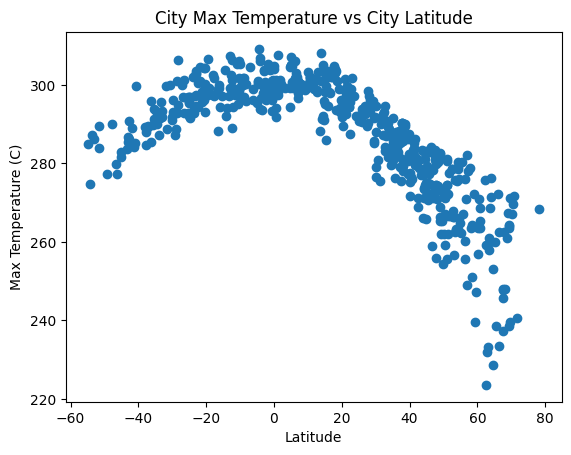

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter('Lat', 'Max Temp', data=city_data_df)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Temperature vs City Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

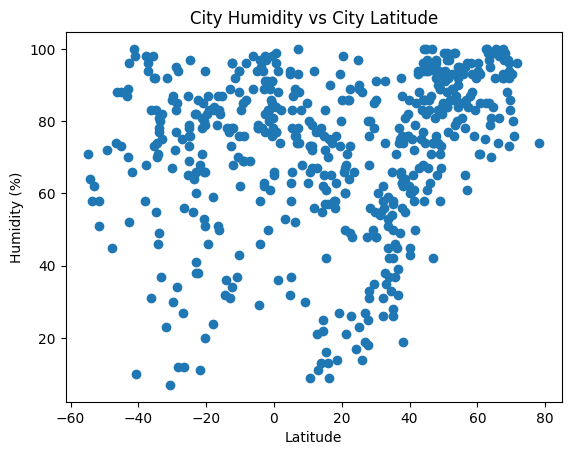

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter('Lat', 'Humidity', data=city_data_df)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs City Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

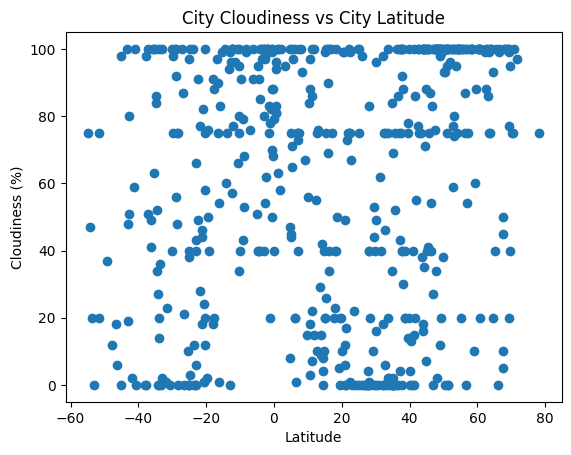

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter('Lat', 'Cloudiness', data=city_data_df)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Cloudiness vs City Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

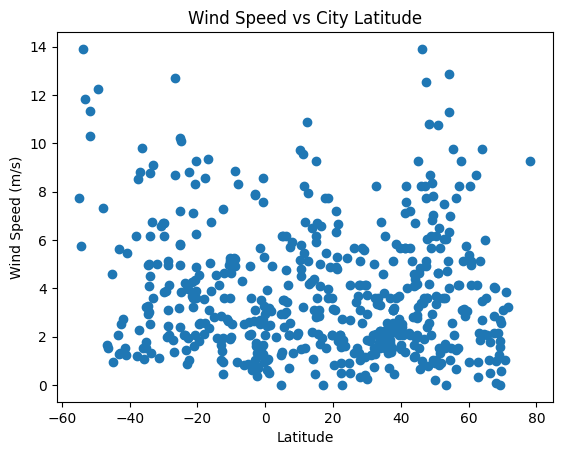

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter('Lat', 'Wind Speed', data=city_data_df)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs City Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def linreg_plot(x, y, data, text_x=None, text_y=None):
  model = linregress(data[x], data[y])
  print(f"The r-value is: {model.rvalue}")

  plt.scatter(x, y, data=data)
  plt.xlabel(x)
  plt.ylabel(y)

  m, b = model.slope, model.intercept
  y_line = [v*m + b for v in data[x].values]
  plt.plot(data[x], y_line, c='r')

  if text_x is not None:
    plt.text(text_x, text_y, f"y = {m:,.2f}x + {b:,.2f}", c='r')

  plt.show()


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lihue,21.9770,-159.3688,294.84,86,75,2.06,US,1701711540
4,tiksi,71.6366,128.8685,240.52,96,97,3.23,RU,1701711542
7,longyearbyen,78.2232,15.6464,268.30,74,75,9.26,NO,1701711545
9,belle chasse,29.8549,-89.9906,291.94,55,40,4.12,US,1701711546
10,bilibino,68.0550,166.4449,247.91,99,100,1.01,RU,1701711547


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto san carlos,-12.6608,-63.5500,302.52,73,96,1.39,BO,1701711539
1,papatowai,-46.5619,169.4708,279.86,74,18,1.67,NZ,1701711540
3,edinburgh of the seven seas,-37.0676,-12.3108,289.48,94,51,8.79,SH,1701711541
5,adamstown,-25.0667,-130.1002,295.59,79,38,5.80,PN,1701711543
6,port-aux-francais,-49.3498,70.2200,277.27,72,37,12.25,FR,1701711544


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8729123682382688


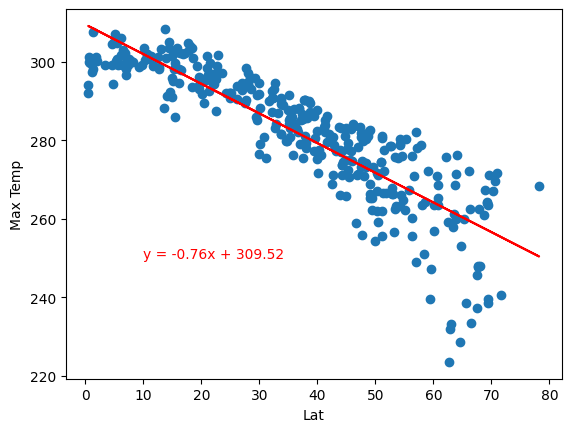

In [ ]:
# Linear regression on Northern Hemisphere
linreg_plot('Lat', 'Max Temp', northern_hemi_df, 10, 250)

The r-value is: 0.7302529987626026


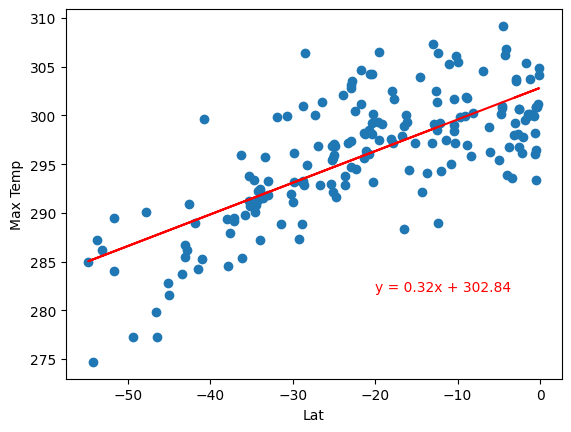

In [ ]:
# Linear regression on Southern Hemisphere
linreg_plot('Lat', 'Max Temp', southern_hemi_df, -20, 282)

**Discussion about the linear relationship:** \
- There is a strong linear relationship between latitude and max-temperature suggesting: Latitudes closer to the equator tend to have higher max-temperatures than those farther away

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4046171748339504


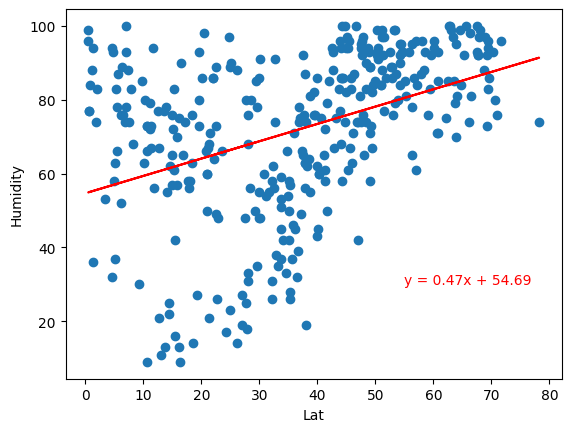

In [ ]:
# Northern Hemisphere
linreg_plot('Lat', 'Humidity', northern_hemi_df, 55, 30)

The r-value is: 0.1540287620531188


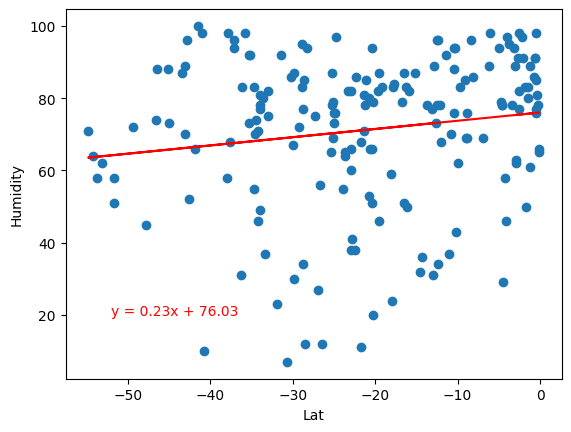

In [ ]:
# Southern Hemisphere
linreg_plot('Lat', 'Humidity', southern_hemi_df, -52, 20)

**Discussion about the linear relationship:** \
- There is a relatively weak positive correlation between humidity and latitude,. The correltation is especially weak in the southern hemisphere. In the northern hemisphere the correlation is a little stronger.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23956642640885936


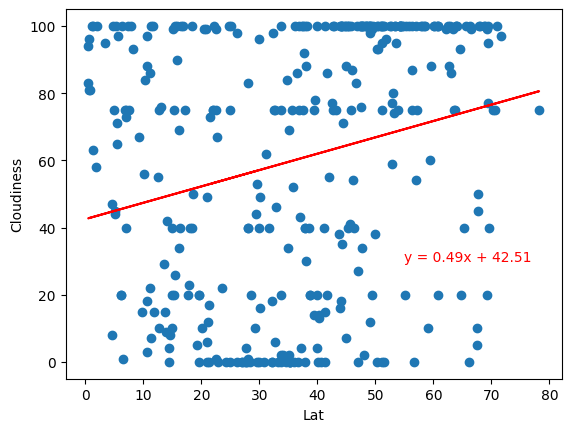

In [ ]:
# Northern Hemisphere
linreg_plot('Lat', 'Cloudiness', northern_hemi_df, 55, 30)

The r-value is: 0.3701884208226379


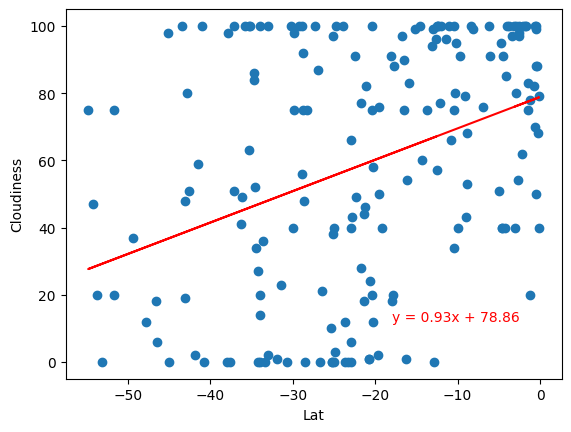

In [ ]:
# Southern Hemisphere
linreg_plot('Lat', 'Cloudiness', southern_hemi_df, -18, 12)

**Discussion about the linear relationship:** \
- There is a relatively weak positive correlation between cloudyness and latitude,. The correltation is especially weak in the northern hemisphere. In the southern hemisphere the correlation is a little stronger.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04335969086526508


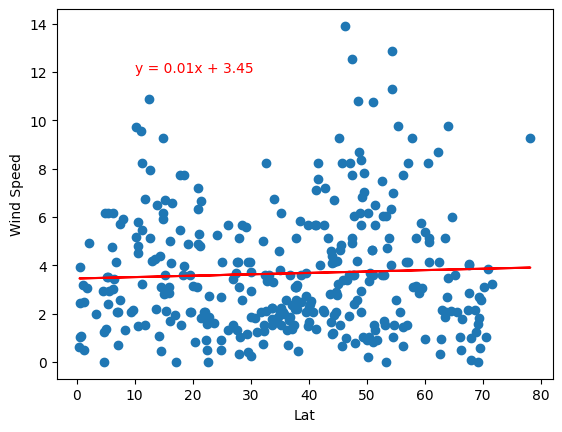

In [ ]:
# Northern Hemisphere
linreg_plot('Lat', 'Wind Speed', northern_hemi_df, 10, 12)

The r-value is: -0.30858826397420397


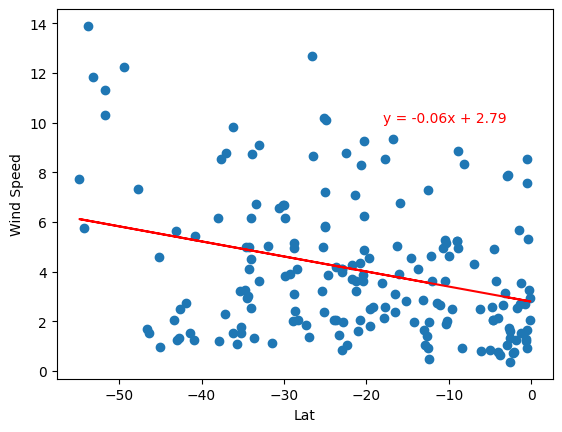

In [ ]:
# Southern Hemisphere
linreg_plot('Lat', 'Wind Speed', southern_hemi_df, -18, 10)

**Discussion about the linear relationship:**
- There is a near-zero correlation between windspeed and latitude. The correlation is especially weak in the northern hemisphere. In the southern hemisphere, there is a stronger negative linear correlation, but there are possible outliers in low latitude lattice that could need further investigation.